In [12]:
import retro
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
env = None

In [15]:
if env is None:
    env = retro.make(game='SonicTheHedgehog-Genesis', state='GreenHillZone.Act1', record='.')
_ = env.reset()

In [51]:
for i in range( 10 ):
    env.step( env.action_space.sample() )
frame, reward, done, info = env.step( env.action_space.sample() )
FRAME_SHAPE = frame.shape

{'level_end_bonus': 0, 'rings': 0, 'score': 0, 'zone': 0, 'act': 0, 'screen_x_end': 9407, 'screen_y': 768, 'lives': 3, 'x': 64, 'y': 919, 'screen_x': 0}


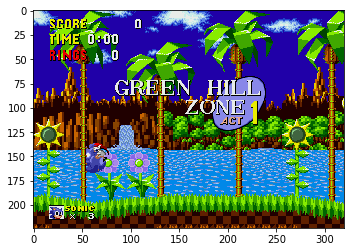

In [52]:
plt.imshow( frame )
print( info )

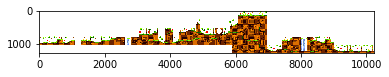

In [57]:
foreground = plt.imread( 'data/Green Hill Zone Act 1/foreground.png' )
foreground_col1 = plt.imread( 'data/Green Hill Zone Act 1/foreground_col1.png' )
plt.imshow( foreground )

def clipToInfo( _image, _info ):
    return _image[ _info[ 'screen_y' ]:_info[ 'screen_y' ] + FRAME_SHAPE[ 0 ], _info[ 'screen_x' ]:_info[ 'screen_x' ] + FRAME_SHAPE[ 1 ] ]

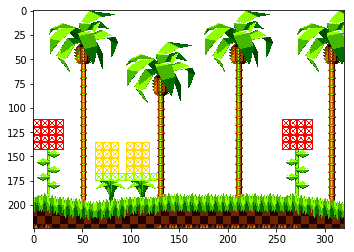

In [58]:
clipped_foreground = clipToInfo( foreground, info )
plt.imshow( clipped_foreground )

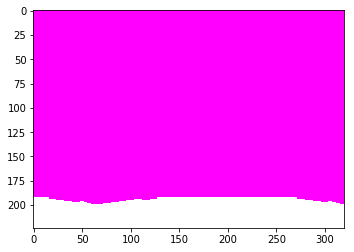

In [59]:
clipped_foreground_col1 = clipToInfo( foreground_col1, info )
plt.imshow( clipped_foreground_col1 )